<a href="https://colab.research.google.com/github/mihirtripathi0820/21bds0169_da1_part1_theory/blob/main/21BDS0169_EDA_THEORY_DA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BCSE331L Exploratory Data Analysis - Digital Assessment I
# Name: Mihir Tripathi
# Reg. No.: 21BDS0169


In [ ]:
#https://github.com/mihirtripathi0820/21bds0169_EDA_DA1/blob/main/21BDS0169_EDA_THEORY_DA1.ipynb
#21bds0169
#Mihir Tripathi

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset

In [2]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/PhDPublications.csv"
df = pd.read_csv(url)
df.head()

,rownames,articles,gender,married,kids,prestige,mentor
0,1,0,male,yes,0,2.52,7
1,2,0,female,no,0,2.05,6
2,3,0,female,no,0,3.75,6
3,4,0,male,yes,1,1.18,3
4,5,0,female,no,0,3.75,26


# 1. Data Dimension and Summary

In [3]:
print("Shape of the dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())
print("\nSummary Statistics:\n", df.describe())

Shape of the dataset: (915, 7)

Data Types:
 rownames      int64
articles      int64
gender       object
married      object
kids          int64
prestige    float64
mentor        int64
dtype: object

First 5 Rows:
    rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
3         4         0    male     yes     1      1.18       3
4         5         0  female      no     0      3.75      26

Summary Statistics:
          rownames    articles        kids    prestige      mentor
count  915.000000  915.000000  915.000000  915.000000  915.000000
mean   458.000000    1.692896    0.495082    3.103109    8.767213
std    264.282046    1.926069    0.764880    0.984249    9.483916
min      1.000000    0.000000    0.000000    0.755000    0.000000
25%    229.500000    0.000000    0.000000    2.260000    3.00

# 2. Data Handling and Cleaning

In [4]:
print("\nMissing Values:\n", df.isnull().sum())
df.drop_duplicates(inplace=True)


Missing Values:
 rownames    0
articles    0
gender      0
married     0
kids        0
prestige    0
mentor      0
dtype: int64


# Handling missing values (if any)

In [5]:
df.fillna(df.mean(numeric_only=True), inplace=True)

# Reshaping the dataset using Hierarchical Indexing

In [6]:
df.set_index(['gender', 'married'], inplace=True)

In [7]:
print("\nDataset with Hierarchical Indexing:")
print(df.head())


Dataset with Hierarchical Indexing:
                rownames  articles  kids  prestige  mentor
gender married                                            
male   yes             1         0     0      2.52       7
female no              2         0     0      2.05       6
       no              3         0     0      3.75       6
male   yes             4         0     1      1.18       3
female no              5         0     0      3.75      26


In [8]:
grouped = df.groupby(level=[0, 1]).agg({'articles': ['mean', 'sum', 'count']})
print("\nGrouped Statistics (Articles) by Gender and Marital Status:")
print(grouped)


Grouped Statistics (Articles) by Gender and Marital Status:
                articles           
                    mean  sum count
gender married                     
female no       1.387755  272   196
       yes      1.542222  347   225
male   no       1.946903  220   113
       yes      1.863517  710   381


In [9]:
unstacked = grouped.unstack(level=0)
print("\nUnstacked Grouped Data:")
print(unstacked)


Unstacked Grouped Data:
         articles                                  
             mean              sum       count     
gender     female      male female male female male
married                                            
no       1.387755  1.946903    272  220    196  113
yes      1.542222  1.863517    347  710    225  381


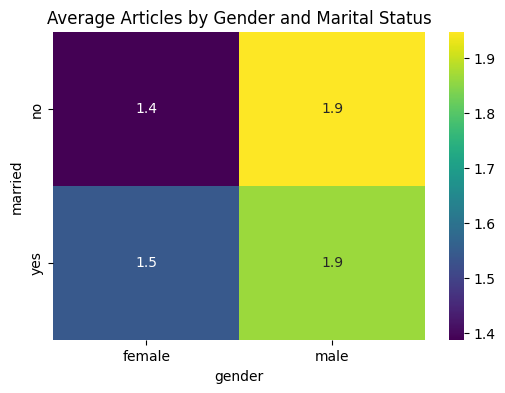

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(unstacked['articles']['mean'], annot=True, cmap='viridis')
plt.title('Average Articles by Gender and Marital Status-21bds0169')
plt.show()

In [11]:
df.reset_index(inplace=True)

#Discretization and binning

# 1. Discretization of 'articles' using Equal-Width Binning

In [12]:
df['articles_bins_width'] = pd.cut(df['articles'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
print("\nEqual-Width Binning of 'articles':")
print(df['articles_bins_width'].value_counts())


Equal-Width Binning of 'articles':
articles_bins_width
Very Low     783
Low          123
Medium         5
High           2
Very High      2
Name: count, dtype: int64


# 2. Discretization of 'mentor' using Equal-Frequency Binning

In [13]:
df['mentor_bins_freq'] = pd.qcut(df['mentor'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
print("\nEqual-Frequency Binning of 'mentor':")
print(df['mentor_bins_freq'].value_counts())


Equal-Frequency Binning of 'mentor':
mentor_bins_freq
Q1    291
Q3    216
Q4    207
Q2    201
Name: count, dtype: int64


<ipython-input-14-c102fc147312>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mentor_bins_freq', data=df, palette='viridis')


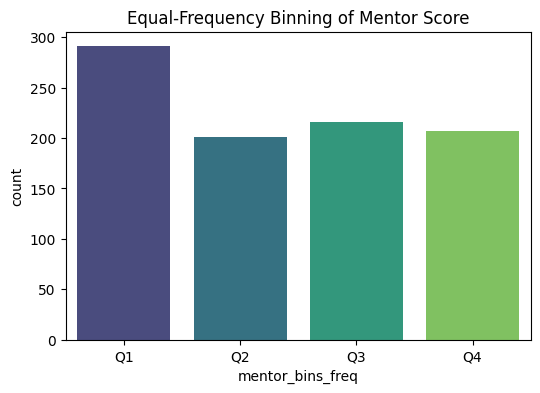

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='mentor_bins_freq', data=df, palette='viridis')
plt.title('Equal-Frequency Binning of Mentor Score-21bds0169')
plt.show()

# 3. Custom Binning for 'prestige'

In [15]:
bins = [0, 1.5, 2.5, 3.5, 5]
labels = ['Low', 'Average', 'Good', 'Excellent']
df['prestige_category'] = pd.cut(df['prestige'], bins=bins, labels=labels)


In [16]:
print("\nCustom Binning for 'prestige':")
print(df['prestige_category'].value_counts())


Custom Binning for 'prestige':
prestige_category
Excellent    352
Good         284
Average      237
Low           42
Name: count, dtype: int64


<ipython-input-17-46df2943d444>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='prestige_category', data=df, palette='cividis')


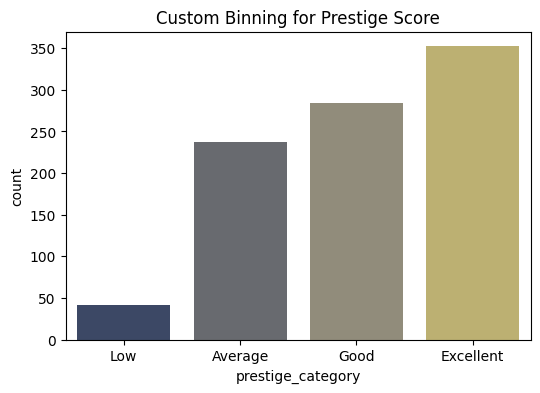

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='prestige_category', data=df, palette='cividis')
plt.title('Custom Binning for Prestige Score-21bds0169')
plt.show()

# 4. Display Modified Dataset with Bins

In [18]:
print("\nDataset with Discretization Columns:")
print(df[['articles', 'articles_bins_width', 'mentor', 'mentor_bins_freq', 'prestige', 'prestige_category']].head())


Dataset with Discretization Columns:
   articles articles_bins_width  mentor mentor_bins_freq  prestige  \
0         0            Very Low       7               Q3      2.52   
1         0            Very Low       6               Q2      2.05   
2         0            Very Low       6               Q2      3.75   
3         0            Very Low       3               Q1      1.18   
4         0            Very Low      26               Q4      3.75   

  prestige_category  
0              Good  
1           Average  
2         Excellent  
3               Low  
4         Excellent  


# Outlier detection and filtering

# 1. Outlier Detection using IQR Method

In [19]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


In [20]:
articles_outliers = detect_outliers_iqr(df, 'articles')
mentor_outliers = detect_outliers_iqr(df, 'mentor')

In [21]:
print(f"\nOutliers in 'articles' column:\n{articles_outliers}")
print(f"\nOutliers in 'mentor' column:\n{mentor_outliers}")


Outliers in 'articles' column:
     gender married  rownames  articles  kids  prestige  mentor  \
877    male     yes       878         6     1      4.62       8   
878  female     yes       879         6     0      2.10      36   
879  female     yes       880         6     2      1.86      38   
880    male     yes       881         6     0      4.34       9   
881  female     yes       882         6     0      4.29      24   
882    male     yes       883         6     2      2.51      11   
883    male     yes       884         6     1      2.96      13   
884    male      no       885         6     0      4.29      18   
885    male      no       886         6     0      3.40      14   
886  female      no       887         6     0      4.54      12   
887    male     yes       888         6     1      3.85      16   
888  female      no       889         6     0      3.15       9   
889  female      no       890         6     0      4.54      15   
890    male      no       891 

# Visualize Outliers using Boxplots

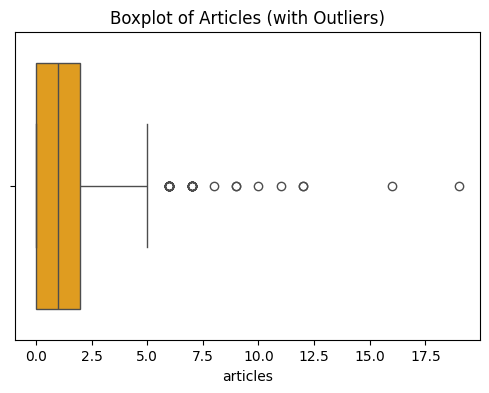

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['articles'], color='orange')
plt.title('Boxplot of Articles (with Outliers)-21bds0169')
plt.show()

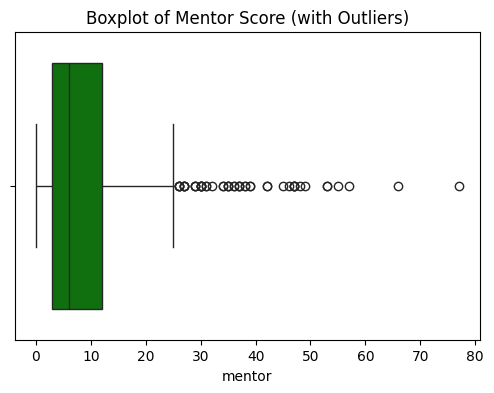

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['mentor'], color='green')
plt.title('Boxplot of Mentor Score (with Outliers)-21bds0169')
plt.show()

# 2. Filtering Out Outliers

In [24]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [25]:
df_clean = remove_outliers_iqr(df, 'articles')
df_clean = remove_outliers_iqr(df_clean, 'mentor')

In [26]:
print("\nShape of Dataset Before Removing Outliers:", df.shape)
print("Shape of Dataset After Removing Outliers:", df_clean.shape)


Shape of Dataset Before Removing Outliers: (915, 10)
Shape of Dataset After Removing Outliers: (821, 10)


# 3. Visualize After Outlier Removal

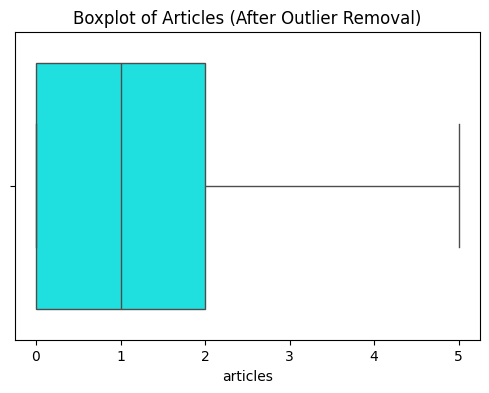

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean['articles'], color='cyan')
plt.title('Boxplot of Articles (After Outlier Removal)-21bds0169')
plt.show()

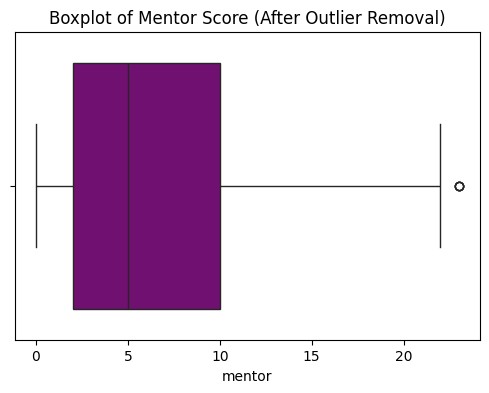

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean['mentor'], color='purple')
plt.title('Boxplot of Mentor Score (After Outlier Removal)-21bds0169')
plt.show()

# 4. Display Cleaned Dataset

In [29]:
print("\nCleaned Dataset (Outliers Removed):")
print(df_clean.head())


Cleaned Dataset (Outliers Removed):
   gender married  rownames  articles  kids  prestige  mentor  \
0    male     yes         1         0     0      2.52       7   
1  female      no         2         0     0      2.05       6   
2  female      no         3         0     0      3.75       6   
3    male     yes         4         0     1      1.18       3   
5  female     yes         6         0     2      3.59       2   

  articles_bins_width mentor_bins_freq prestige_category  
0            Very Low               Q3              Good  
1            Very Low               Q2           Average  
2            Very Low               Q2         Excellent  
3            Very Low               Q1               Low  
5            Very Low               Q1         Excellent  


In [30]:
df_clean.to_csv('PhDPublications_Cleaned.csv', index=False)

# 3. Univariate Analysis

In [63]:
df.rename(columns={"prestige": "price"}, inplace=True)
roll_number = "21BDS00169"

# 1. Distribution Plot - Histogram

# Histogram for Height

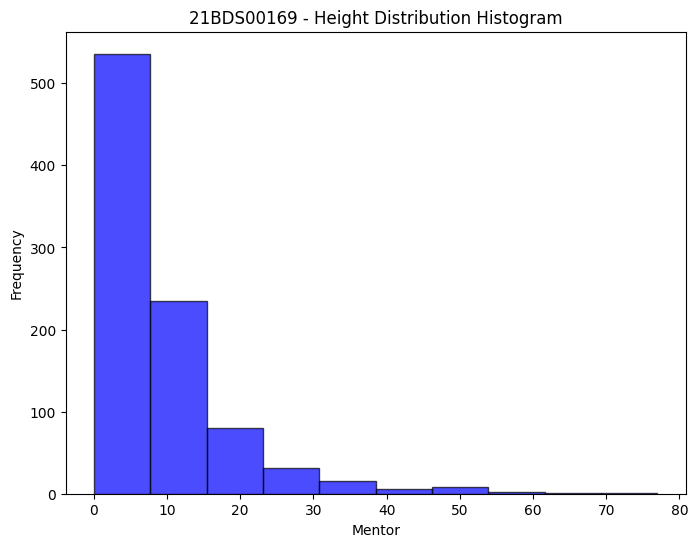

In [64]:
plt.figure(figsize=(8,6))
plt.hist(df["mentor"], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Mentor")
plt.ylabel("Frequency")
plt.title(f"{roll_number} - Height Distribution Histogram")
plt.show()

# Histogram for Price

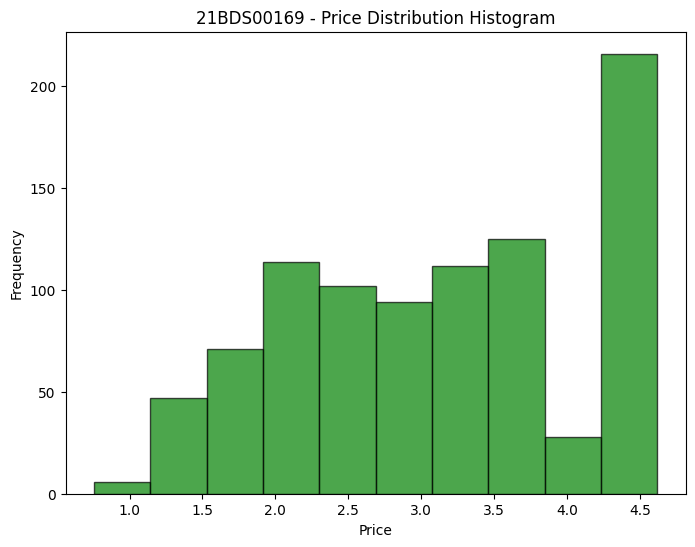

In [66]:
plt.figure(figsize=(8,6))
plt.hist(df["price"], bins=10, color='green', edgecolor='black', alpha=0.7)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title(f"{roll_number} - Price Distribution Histogram")
plt.show()

# 2. Distribution Plot - Density

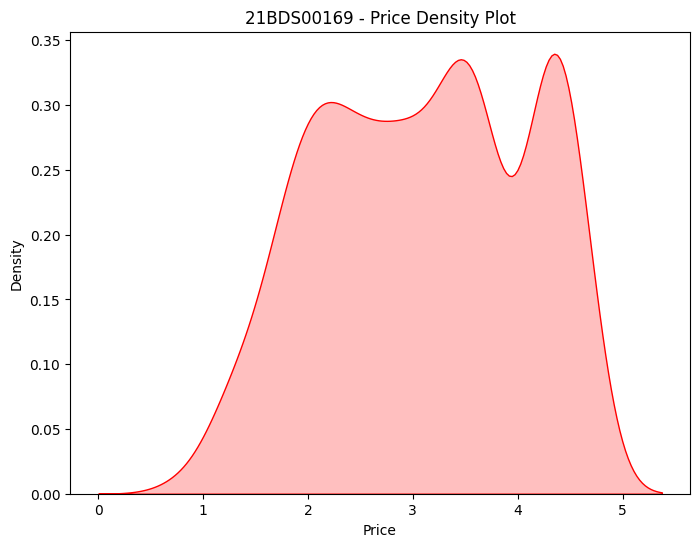

In [67]:
plt.figure(figsize=(8,6))
sns.kdeplot(df["price"], fill=True, color="red")
plt.xlabel("Price")
plt.ylabel("Density")
plt.title(f"{roll_number} - Price Density Plot")
plt.show()

# 3. Histogram and Density Combined

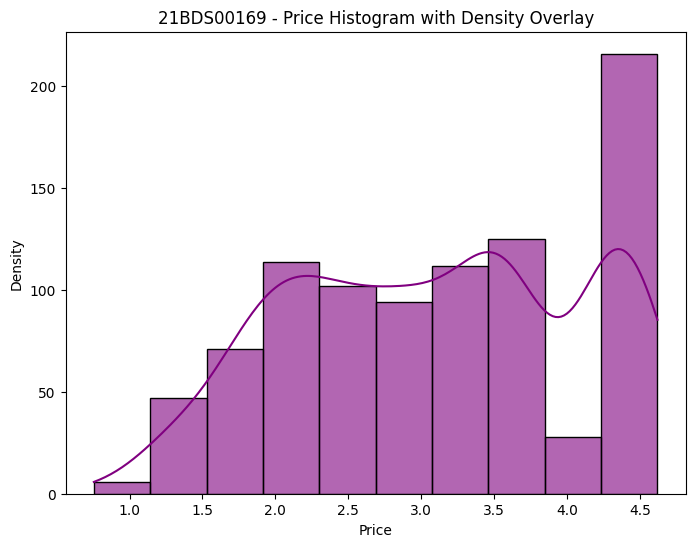

In [68]:
plt.figure(figsize=(8,6))
sns.histplot(df["price"], bins=10, kde=True, color="purple", edgecolor="black", alpha=0.6)
plt.xlabel("Price")
plt.ylabel("Density")
plt.title(f"{roll_number} - Price Histogram with Density Overlay")
plt.show()

# 3. Histogram and Density Combined

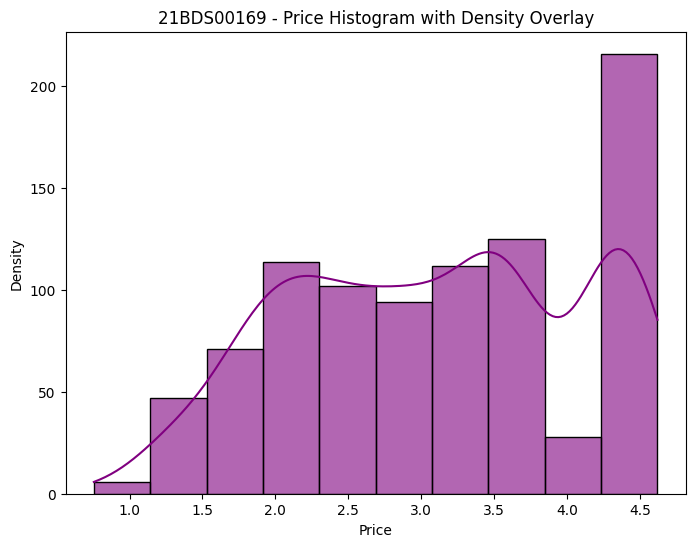

In [69]:
plt.figure(figsize=(8,6))
sns.histplot(df["price"], bins=10, kde=True, color="purple", edgecolor="black", alpha=0.6)
plt.xlabel("Price")
plt.ylabel("Density")
plt.title(f"{roll_number} - Price Histogram with Density Overlay")
plt.show()

# 4. Box Plot

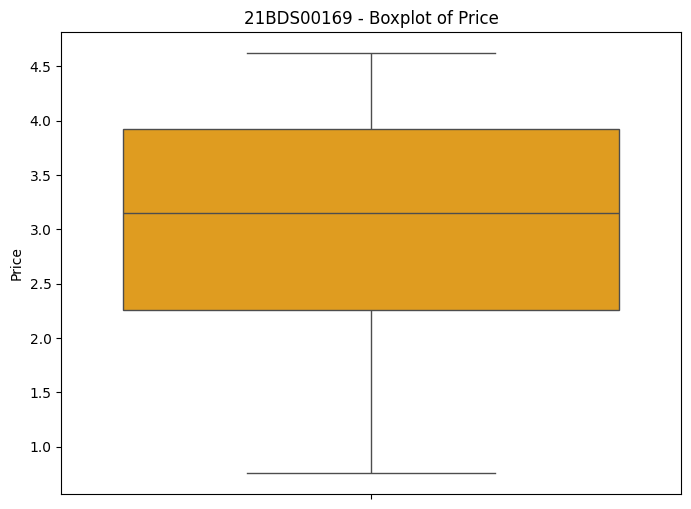

In [70]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df["price"], color="orange")
plt.title(f"{roll_number} - Boxplot of Price")
plt.ylabel("Price")
plt.show()

# 5. Barplot

# Vertical Bar Plot

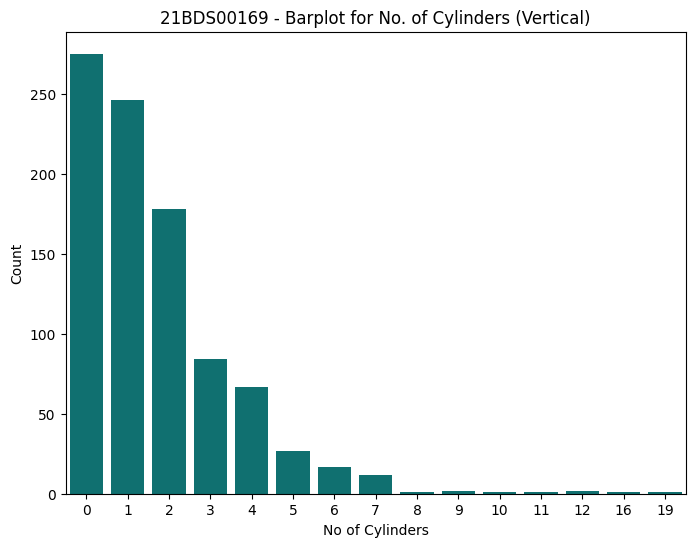

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="articles", color="teal")
plt.xlabel("No of Cylinders")
plt.ylabel("Count")
plt.title(f"{roll_number} - Barplot for No. of Cylinders (Vertical)")
plt.show()

# Horizontal Bar Plot

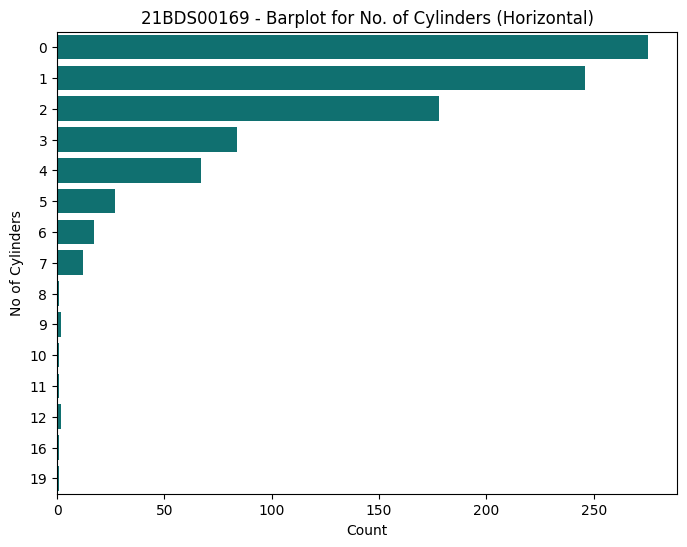

In [72]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y="articles", color="teal")
plt.xlabel("Count")
plt.ylabel("No of Cylinders")
plt.title(f"{roll_number} - Barplot for No. of Cylinders (Horizontal)")
plt.show()

# 6. Pie Plot

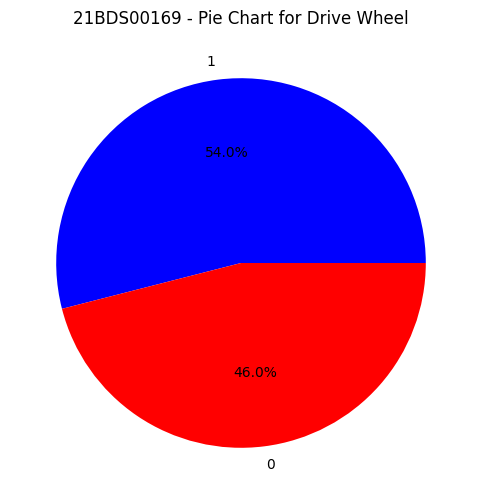

In [73]:
df["gender"].value_counts().plot.pie(autopct='%1.1f%%', colors=["blue", "red"], figsize=(8,6))
plt.title(f"{roll_number} - Pie Chart for Drive Wheel")
plt.ylabel("")  # Hide Y label
plt.show()

# 7. Dot Plot

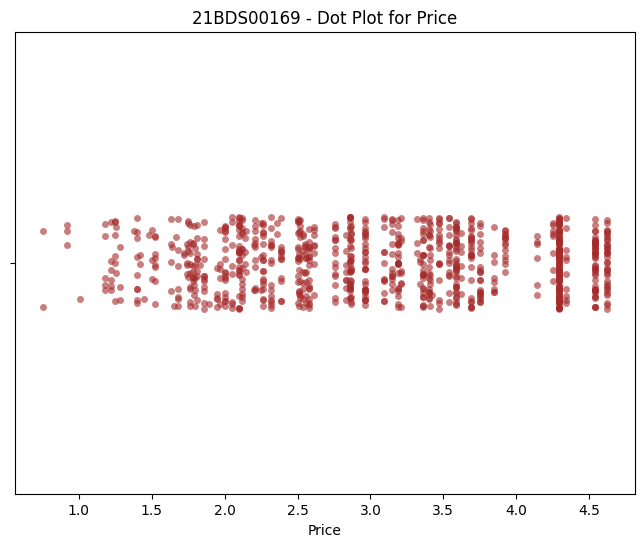

In [74]:
plt.figure(figsize=(8,6))
sns.stripplot(x=df["price"], jitter=True, color="brown", alpha=0.6)
plt.title(f"{roll_number} - Dot Plot for Price")
plt.xlabel("Price")
plt.show()

# 4. Bivariate Analysis

# 1. Categorical vs. Categorical

# Contingency Table

In [45]:
contingency_table = pd.crosstab(df['gender'], df['married'])
print(contingency_table)

married    0    1
gender           
0        196  225
1        113  381


# 1.1 Stacked Bar Chart

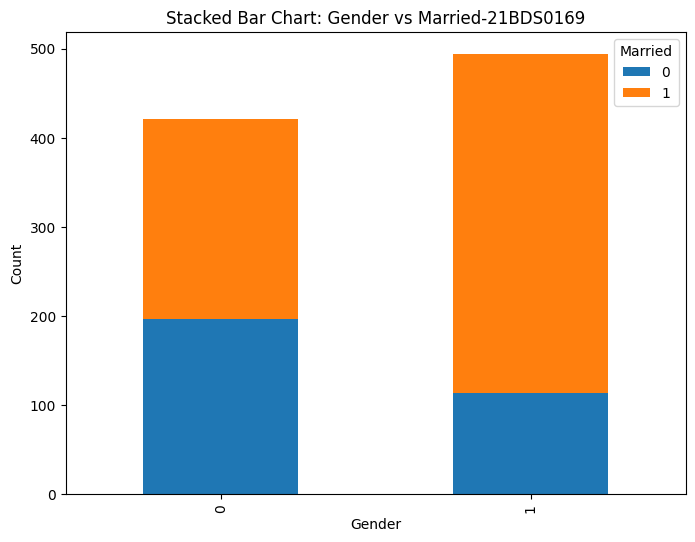

In [46]:
contingency_table.plot(kind="bar", stacked=True, figsize=(8,6))
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Stacked Bar Chart: Gender vs Married-21BDS0169")
plt.legend(title="Married")
plt.show()

# 1.2 Grouped Bar Plot

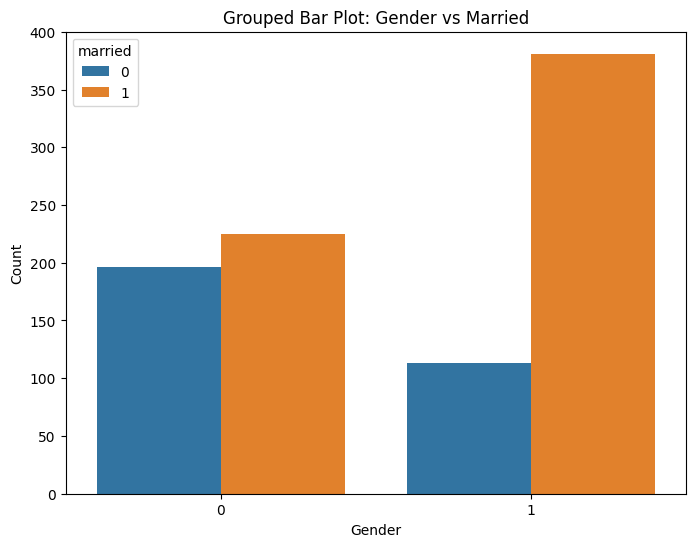

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="gender", hue="married", dodge=True)
plt.title("Grouped Bar Plot: Gender vs Married-21BDS0169")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 2. Quantitative vs. Quantitative

# 2.1 Scatter Plot

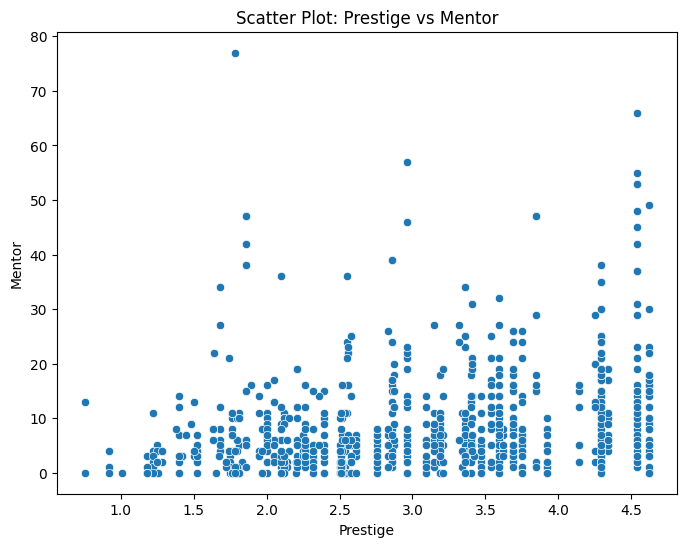

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="prestige", y="mentor")
plt.title("Scatter Plot: Prestige vs Mentor-21BDS0169")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()

# 2.2 Line Plot

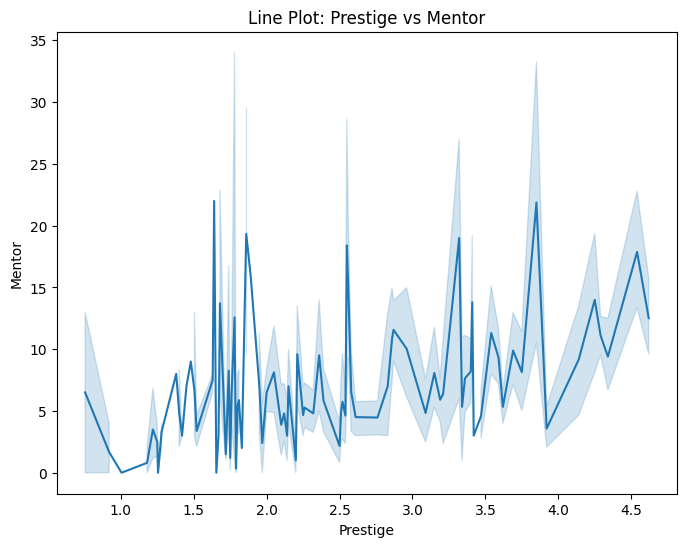

In [50]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="prestige", y="mentor")
plt.title("Line Plot: Prestige vs Mentor-21BDS0169")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()

# 3. Categorical vs. Quantitative

# 3.1 Bar Chart

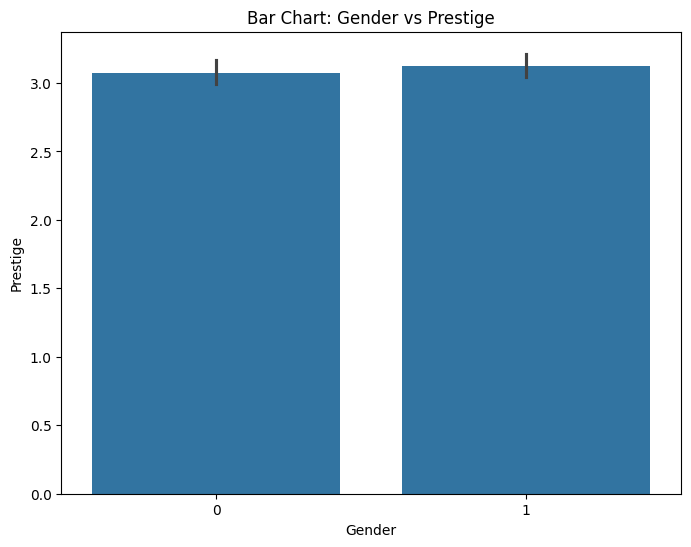

In [52]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="gender", y="prestige")
plt.title("Bar Chart: Gender vs Prestige-21BDS0169")
plt.xlabel("Gender")
plt.ylabel("Prestige")
plt.show()

# 3.2 Density Plot

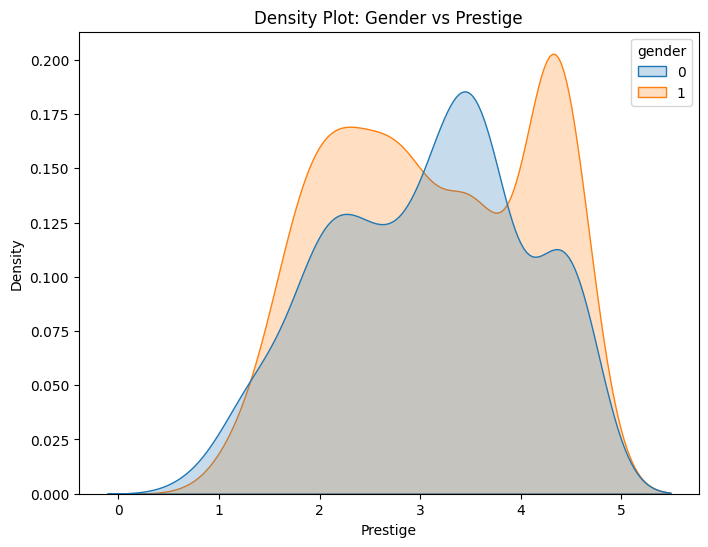

In [53]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x="prestige", hue="gender", fill=True)
plt.title("Density Plot: Gender vs Prestige-21BDS0169")
plt.xlabel("Prestige")
plt.show()

# 3.3 Box Plot

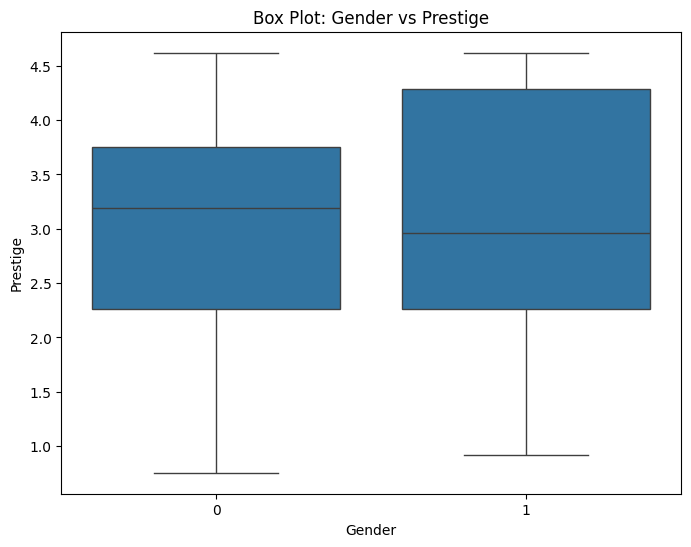

In [54]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="gender", y="prestige")
plt.title("Box Plot: Gender vs Prestige-21BDS0169")
plt.xlabel("Gender")
plt.ylabel("Prestige")
plt.show()

# 3.4 Violin Plot

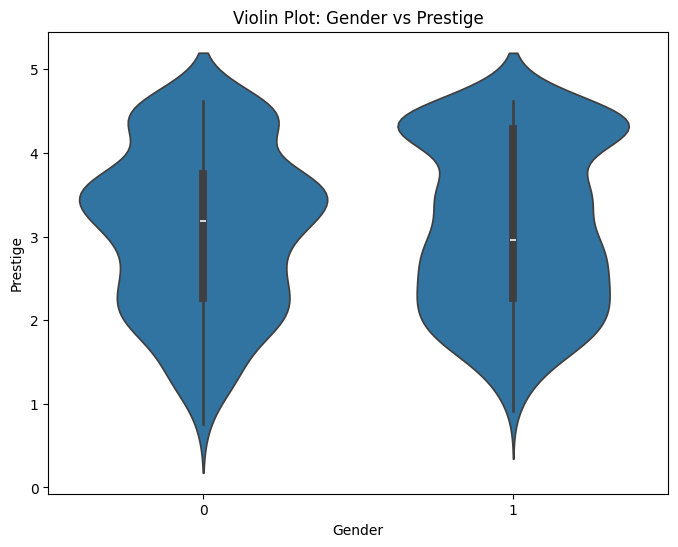

In [55]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="gender", y="prestige")
plt.title("Violin Plot: Gender vs Prestige-21BDS0169")
plt.xlabel("Gender")
plt.ylabel("Prestige")
plt.show()

# 3.5 Combined Violin and Boxplot

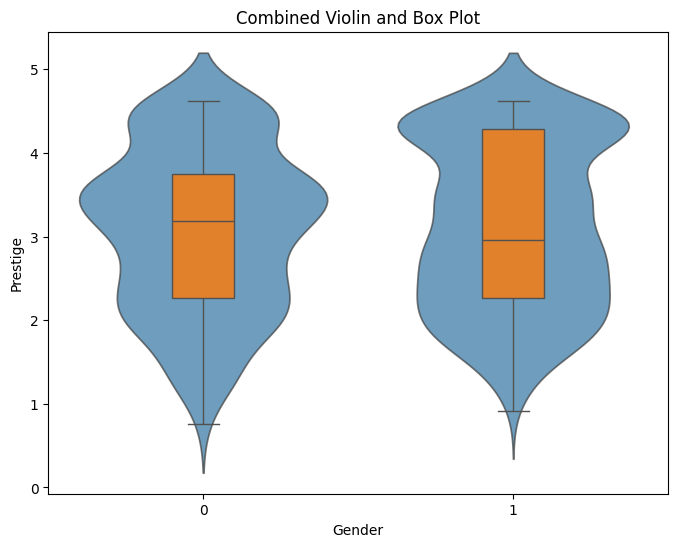

In [56]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="gender", y="prestige", inner=None, alpha=0.7)
sns.boxplot(data=df, x="gender", y="prestige", width=0.2, boxprops={'zorder': 2})
plt.title("Combined Violin and Box Plot-21BDS0169")
plt.xlabel("Gender")
plt.ylabel("Prestige")
plt.show()

# 4. Multivariate Analysis

# 4.1 Scatter Plot (Color as 3rd Variable)

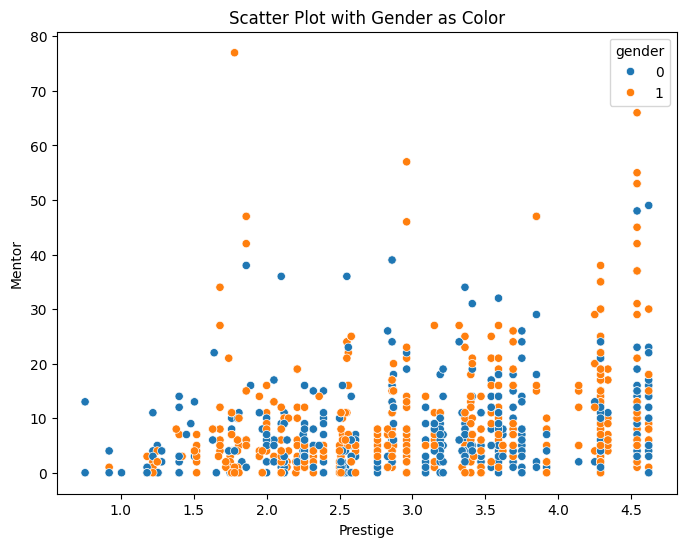

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="prestige", y="mentor", hue="gender")
plt.title("Scatter Plot with Gender as Color-21BDS0169")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()

# 4.2 Scatter Plot (Color as 3rd, Shape as 4th Variable)

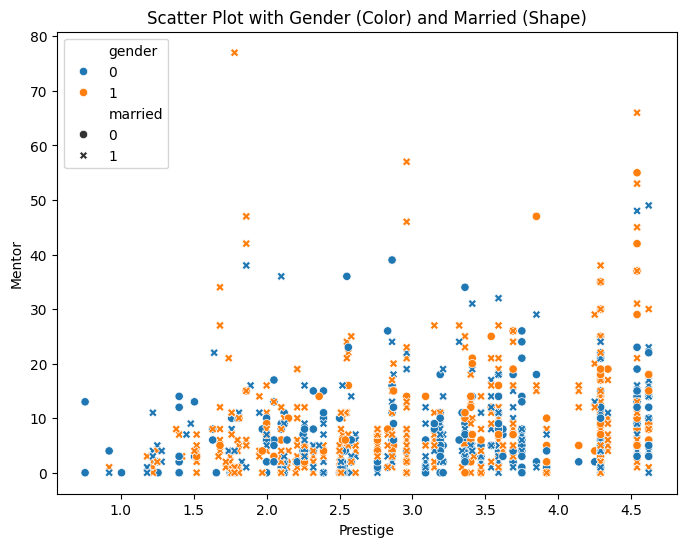

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="prestige", y="mentor", hue="gender", style="married")
plt.title("Scatter Plot with Gender (Color) and Married (Shape)-21BDS0169")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()

# 4.3 Scatter Plot (Color as 3rd, Size as 4th Variable)

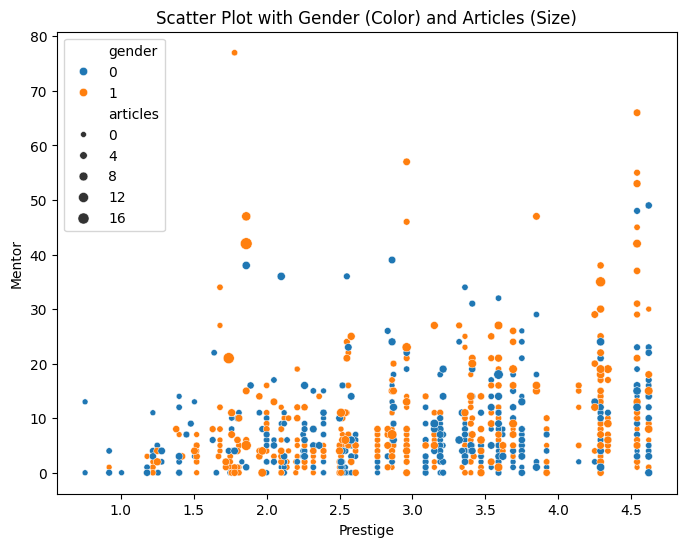

In [59]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="prestige", y="mentor", hue="gender", size="articles")
plt.title("Scatter Plot with Gender (Color) and Articles (Size)-21BDS0169")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()

# 4.4 Bubble Plot

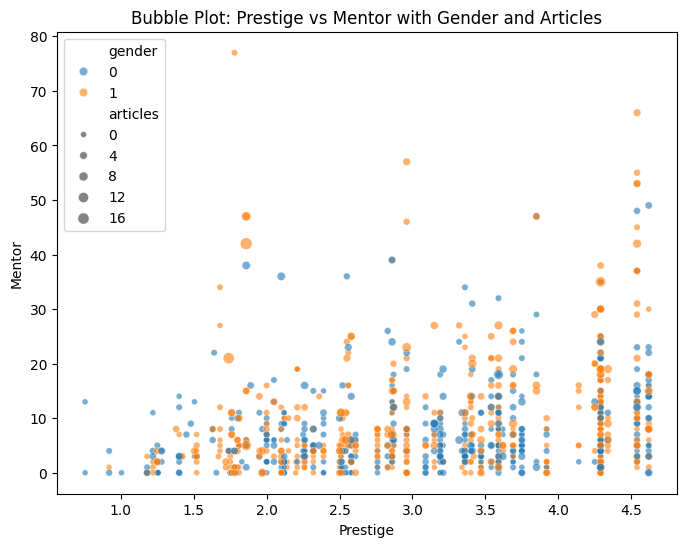

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="prestige", y="mentor", hue="gender", size="articles", alpha=0.6)
plt.title("Bubble Plot: Prestige vs Mentor with Gender and Articles-21BDS0169")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()

# 4.5 Facet Grid (Histogram)

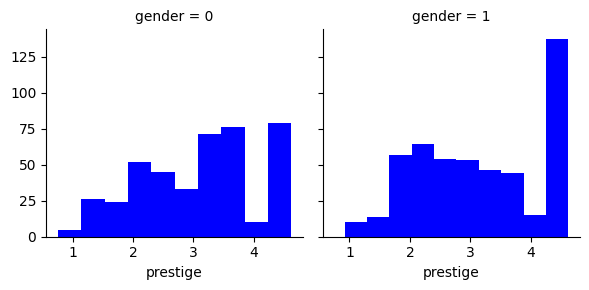

In [61]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.hist, "prestige-21BDS0169", bins=10, color="blue")
plt.show()

# 4.6 Facet Grid (Grid)

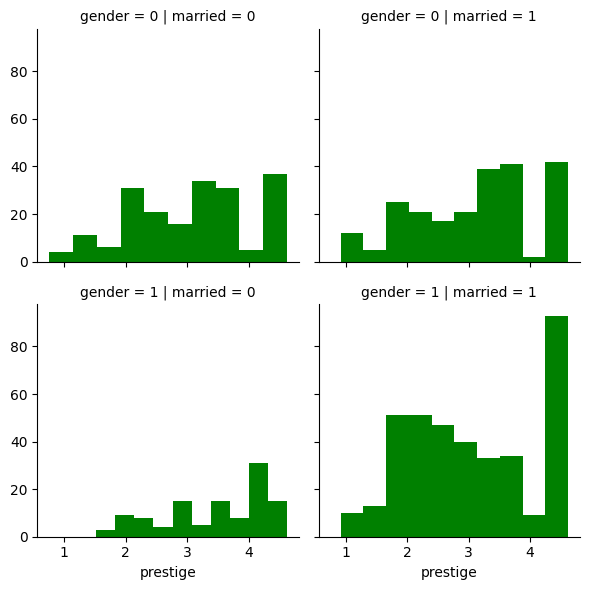

In [62]:
g = sns.FacetGrid(df, row="gender", col="married")
g.map(plt.hist, "prestige-21BDS0169", bins=10, color="green")
plt.show()

<Figure size 800x600 with 0 Axes>

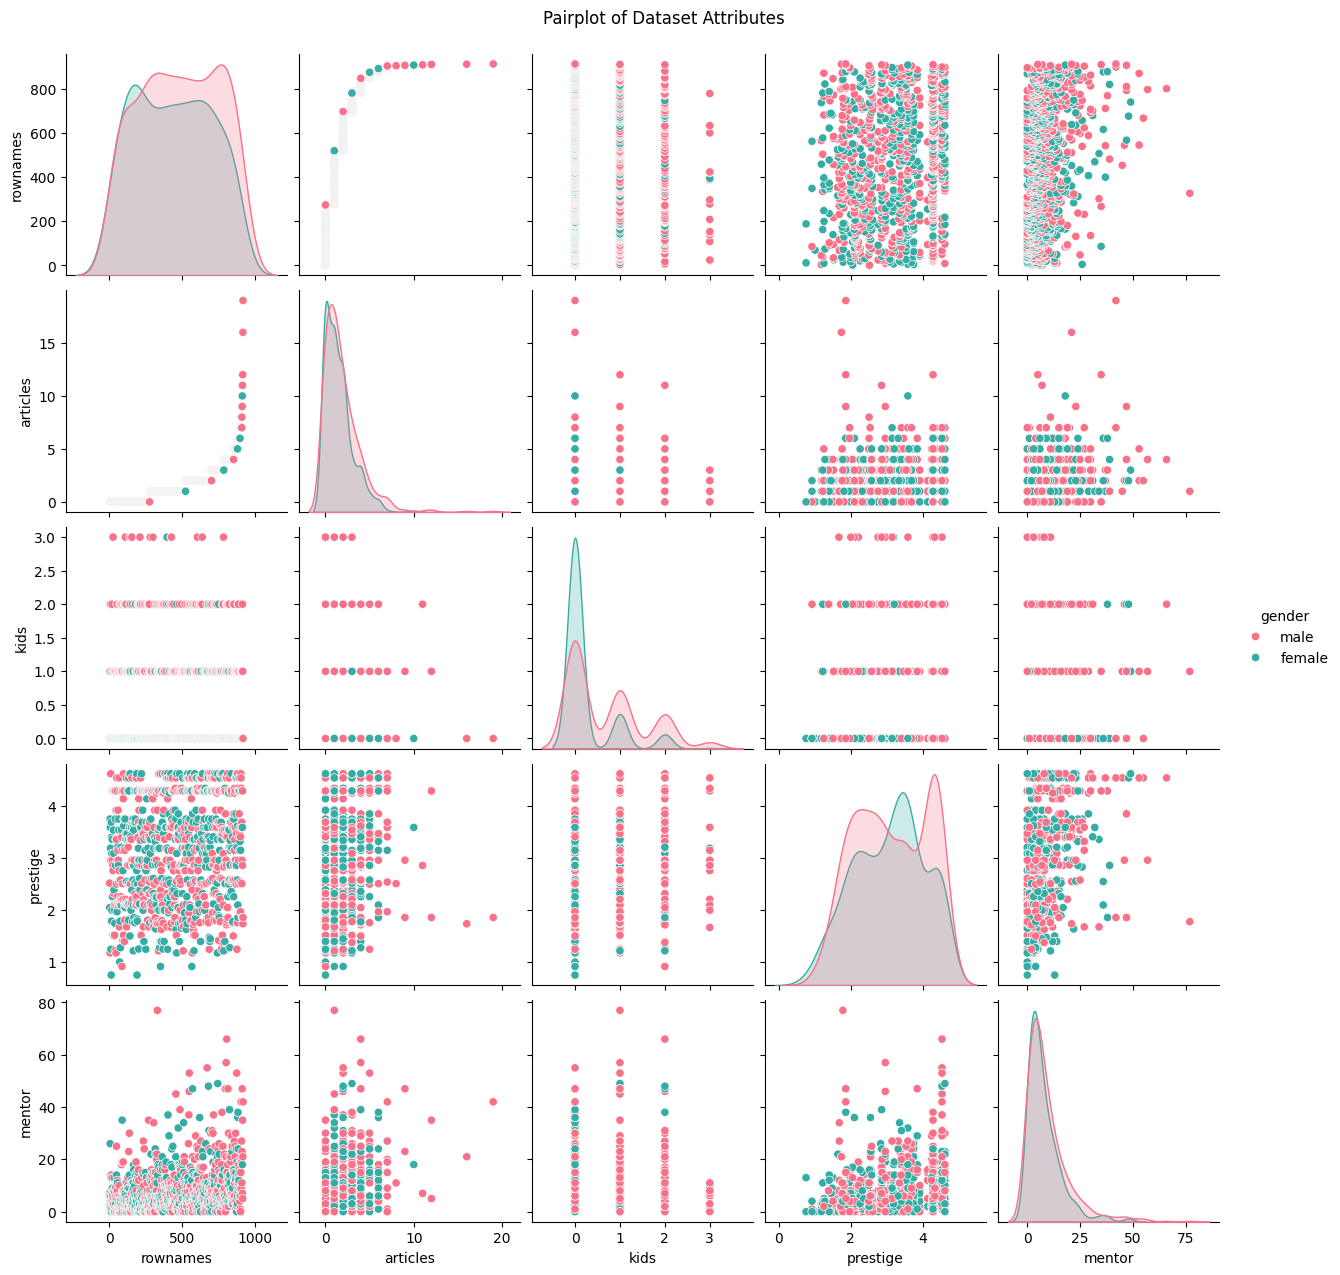

In [36]:
plt.figure(figsize=(8,6))
sns.pairplot(df, hue='gender', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Dataset Attributes', y=1.02)
plt.show()

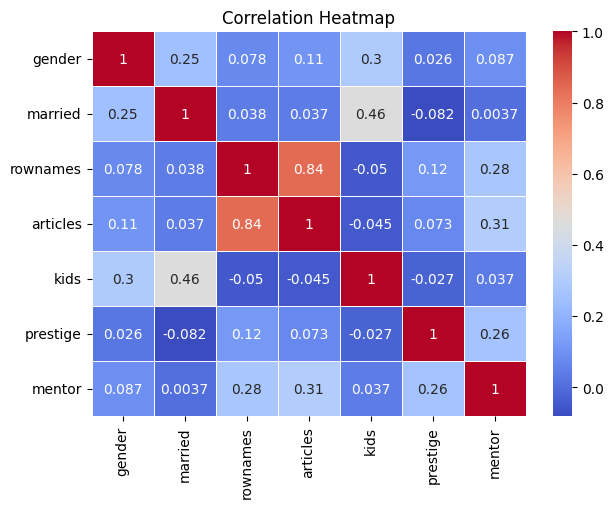

In [37]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for column in ['gender', 'married']:
    df[column] = label_enc.fit_transform(df[column])
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(7,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# FUNDAMENTALS OF TIME SERIES ANALYSIS (TSA)

# Importing necessary libraries

In [38]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Time-Based Indexing

In [39]:
df['rownames'] = pd.to_datetime(df['rownames'], format='%Y', errors='coerce')
df.set_index('rownames', inplace=True)
print("\nFirst 5 Rows of Time Series Data:")
print(df.head())


First 5 Rows of Time Series Data:
          gender  married  articles  kids  prestige  mentor  \
rownames                                                      
NaT            1        1         0     0      2.52       7   
NaT            0        0         0     0      2.05       6   
NaT            0        0         0     0      3.75       6   
NaT            1        1         0     1      1.18       3   
NaT            0        0         0     0      3.75      26   

         articles_bins_width mentor_bins_freq prestige_category  
rownames                                                         
NaT                 Very Low               Q3              Good  
NaT                 Very Low               Q2           Average  
NaT                 Very Low               Q2         Excellent  
NaT                 Very Low               Q1               Low  
NaT                 Very Low               Q4         Excellent  


# 4. Checking Stationarity (ADF Test)

In [40]:
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f"{label}: {value}")
    if result[1] <= 0.05:
        print("\nThe series is stationary.")
    else:
        print("\nThe series is not stationary. Differencing may be required.")

print("\nADF Test for 'articles':")
adf_test(df['articles'])


ADF Test for 'articles':
ADF Statistic: 0.3721411691369656
p-value: 0.980422690713065
#Lags Used: 19
Number of Observations Used: 895

The series is not stationary. Differencing may be required.


# 5. TSA with Open Power System Data (Example)

# Load Open Power System Data (for comparison and practice)

In [41]:
opsd_url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
opsd = pd.read_csv(opsd_url, parse_dates=['Date'], index_col='Date')

# Quick plot of power system data

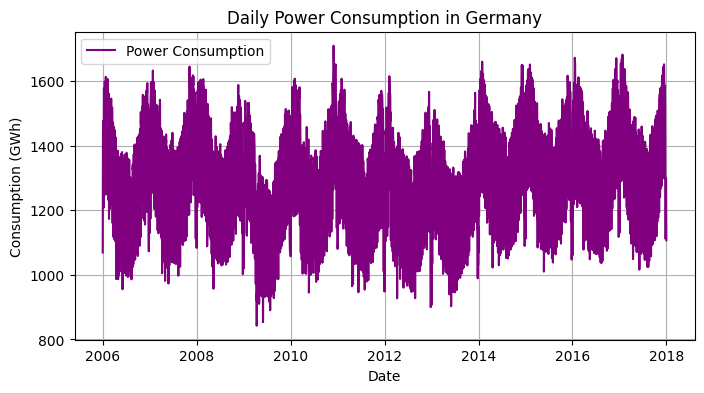

In [42]:
plt.figure(figsize=(8,4))
plt.plot(opsd['Consumption'], label='Power Consumption', color='purple')
plt.title('Daily Power Consumption in Germany')
plt.xlabel('Date')
plt.ylabel('Consumption (GWh)')
plt.grid(True)
plt.legend()
plt.show()

# 5. Optional: Reset Index if Needed

In [43]:
df_reset = df.reset_index()
print("\nDataFrame with 'rownames' Restored as Column:")
print(df_reset.head())


DataFrame with 'rownames' Restored as Column:
  rownames  gender  married  articles  kids  prestige  mentor  \
0      NaT       1        1         0     0      2.52       7   
1      NaT       0        0         0     0      2.05       6   
2      NaT       0        0         0     0      3.75       6   
3      NaT       1        1         0     1      1.18       3   
4      NaT       0        0         0     0      3.75      26   

  articles_bins_width mentor_bins_freq prestige_category  
0            Very Low               Q3              Good  
1            Very Low               Q2           Average  
2            Very Low               Q2         Excellent  
3            Very Low               Q1               Low  
4            Very Low               Q4         Excellent  


# 8. Autocorrelation and Partial Autocorrelation

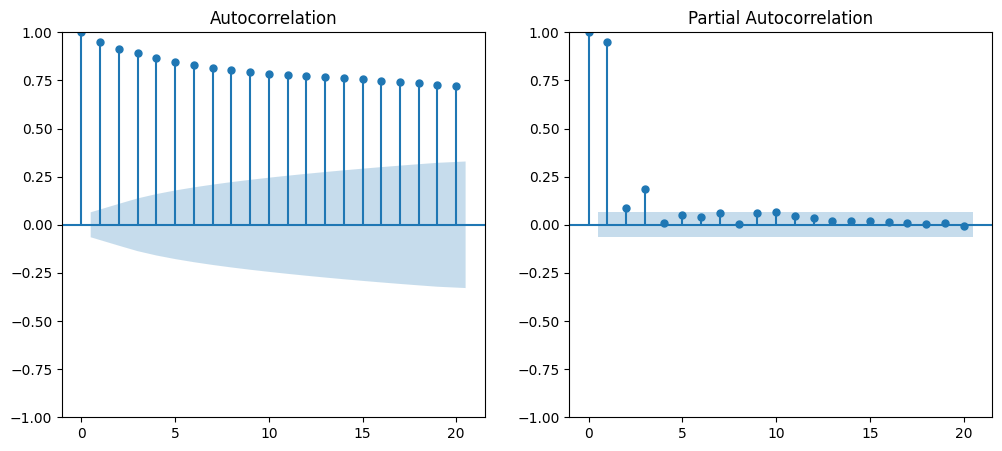

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_acf(df['articles'].dropna(), lags=20, ax=plt.gca(), title='Autocorrelation')
plt.subplot(122)
plot_pacf(df['articles'].dropna(), lags=20, ax=plt.gca(), title='Partial Autocorrelation')
plt.show()


#1D Statistical Data analysis

# Import necessary libraries

In [76]:
from scipy.stats import skew, kurtosis

# 1. Measures of Central Tendency

# Mean Variations

In [77]:
mean_arithmetic = df["price"].mean()
mean_weighted = np.average(df["price"], weights=df["articles"])  # Weighted Mean
mean_trimmed = df["price"].sort_values().iloc[int(0.05*len(df)): int(0.95*len(df))].mean()  # Trimmed Mean

print(f"Arithmetic Mean: {mean_arithmetic}")
print(f"Weighted Mean: {mean_weighted}")
print(f"Trimmed Mean (5% trim): {mean_trimmed}")

Arithmetic Mean: 3.103109264438921
Weighted Mean: 3.185145232391173
Trimmed Mean (5% trim): 3.120260900230084


# Median Variations

In [78]:
median = df["price"].median()
quantiles = df["price"].quantile([0.25, 0.5, 0.75])  # Quartiles
deciles = df["price"].quantile([i/10 for i in range(1, 10)])  # Deciles
percentiles = df["price"].quantile([i/100 for i in range(1, 100)])  # Percentiles

print(f"Median: {median}")
print(f"Quantiles:\n{quantiles}")
print(f"Deciles:\n{deciles}")
print(f"Percentiles (First 10 shown):\n{percentiles.head(10)}")

Median: 3.150000095367432
Quantiles:
0.25    2.26
0.50    3.15
0.75    3.92
Name: price, dtype: float64
Deciles:
0.1    1.78
0.2    2.10
0.3    2.50
0.4    2.86
0.5    3.15
0.6    3.47
0.7    3.69
0.8    4.29
0.9    4.34
Name: price, dtype: float64
Percentiles (First 10 shown):
0.01    1.180
0.02    1.250
0.03    1.322
0.04    1.400
0.05    1.520
0.06    1.630
0.07    1.680
0.08    1.750
0.09    1.760
0.10    1.780
Name: price, dtype: float64


# 2. Measures of Dispersion

In [79]:
range_value = df["price"].max() - df["price"].min()
iqr = df["price"].quantile(0.75) - df["price"].quantile(0.25)  # Interquartile Range
interdecile_range = df["price"].quantile(0.9) - df["price"].quantile(0.1)  # Interdecile Range
std_dev = df["price"].std()
variance = df["price"].var()
skewness = skew(df["price"])
kurt = kurtosis(df["price"])

print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Interdecile Range: {interdecile_range}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Range: 3.8649998903274536
IQR: 1.660000085830688
Interdecile Range: 2.56000018119812
Standard Deviation: 0.9842490775485722
Variance: 0.9687462466552151
Skewness: -0.12221539828147324
Kurtosis: -1.075346390151884


# 3. Frequency Distribution & Plots

# Frequency Distribution

In [80]:
freq_dist = pd.cut(df["price"], bins=10).value_counts()
print("Frequency Distribution:\n", freq_dist)

Frequency Distribution:
 price
(4.233, 4.62]     216
(3.46, 3.847]     125
(1.914, 2.301]    114
(3.074, 3.46]     112
(2.301, 2.687]    102
(2.687, 3.074]     94
(1.528, 1.914]     71
(1.141, 1.528]     47
(3.847, 4.233]     28
(0.751, 1.141]      6
Name: count, dtype: int64


# Histogram

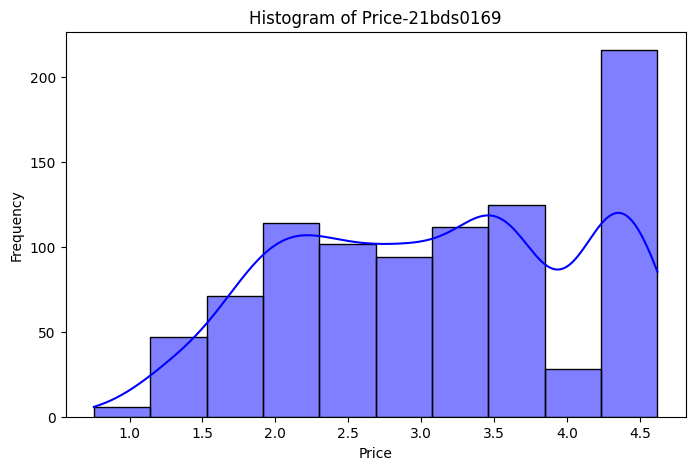

In [82]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=10, kde=True, color="blue", edgecolor="black")
plt.title("Histogram of Price-21bds0169")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Relative Frequency Distribution

In [83]:
rel_freq = freq_dist / freq_dist.sum()
print("Relative Frequency Distribution:\n", rel_freq)

Relative Frequency Distribution:
 price
(4.233, 4.62]     0.236066
(3.46, 3.847]     0.136612
(1.914, 2.301]    0.124590
(3.074, 3.46]     0.122404
(2.301, 2.687]    0.111475
(2.687, 3.074]    0.102732
(1.528, 1.914]    0.077596
(1.141, 1.528]    0.051366
(3.847, 4.233]    0.030601
(0.751, 1.141]    0.006557
Name: count, dtype: float64


# Cumulative Frequency Distribution

In [84]:
cum_freq = freq_dist.cumsum()
print("Cumulative Frequency Distribution:\n", cum_freq)

Cumulative Frequency Distribution:
 price
(4.233, 4.62]     216
(3.46, 3.847]     341
(1.914, 2.301]    455
(3.074, 3.46]     567
(2.301, 2.687]    669
(2.687, 3.074]    763
(1.528, 1.914]    834
(1.141, 1.528]    881
(3.847, 4.233]    909
(0.751, 1.141]    915
Name: count, dtype: int64


# 4. Categorical Variable Analysis

# Pie Chart for Gender

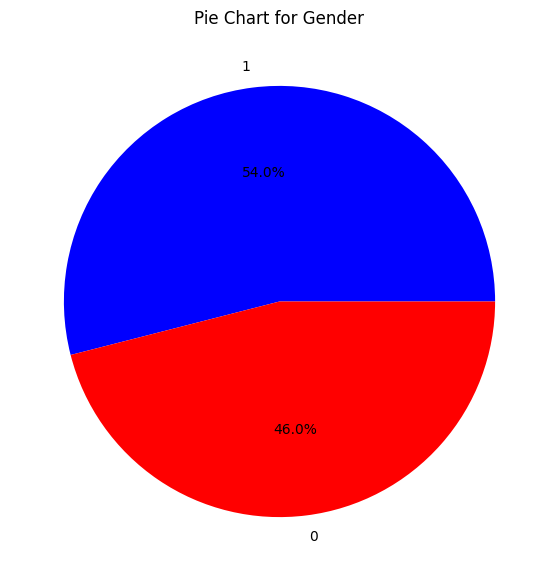

In [87]:
df["gender"].value_counts().plot.pie(autopct='%1.1f%%', colors=["blue", "red"], figsize=(7,7))
plt.title("Pie Chart for Gender")
plt.ylabel("")
plt.show()

# Stacked Bar Plot for Gender and Married Status

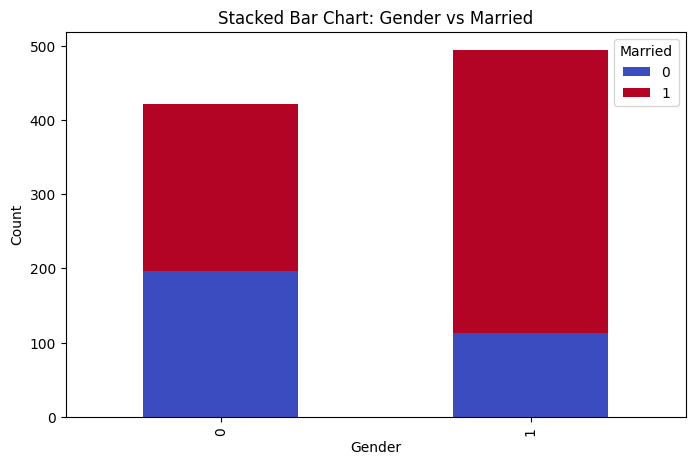

In [88]:
df_ct = pd.crosstab(df["gender"], df["married"])
df_ct.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8,5))
plt.title("Stacked Bar Chart: Gender vs Married")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Married")
plt.show()

#2D Analysis

In [89]:
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

# 1. Create a 2-Way Contingency Table (Categorical vs Categorical)

In [90]:
cat_cat_table = pd.crosstab(df["gender"], df["married"])
print("Categorical-Categorical Contingency Table:\n", cat_cat_table)

Categorical-Categorical Contingency Table:
 married    0    1
gender           
0        196  225
1        113  381



# 2. Create a 2-Way Contingency Table (Categorical vs Numerical)

In [93]:
cat_num_table = df.groupby("gender")["articles"].mean()
print("\nCategorical-Numerical Contingency Table:\n", cat_num_table)


Categorical-Numerical Contingency Table:
 gender
0    1.470309
1    1.882591
Name: articles, dtype: float64


# 3. Create a 3-Way Contingency Table

In [95]:
three_way_table = pd.crosstab(index=df["gender"], columns=[df["married"], df["kids"]])
print("\n3-Way Contingency Table:\n", three_way_table)


3-Way Contingency Table:
 married    0    1             
kids       0    0    1   2   3
gender                        
0        196  145   56  23   1
1        113  145  139  82  15


# 4. Apply Row Profile, Column Profile, Relative Frequency, Chi-Square Test

# Row Profile (Normalize by Row)

In [96]:
row_profile = cat_cat_table.div(cat_cat_table.sum(axis=1), axis=0)
print("\nRow Profile Dataset:\n", row_profile)


Row Profile Dataset:
 married         0         1
gender                     
0        0.465558  0.534442
1        0.228745  0.771255


# Column Profile (Normalize by Column)

In [97]:
col_profile = cat_cat_table.div(cat_cat_table.sum(axis=0), axis=1)
print("\nColumn Profile Dataset:\n", col_profile)


Column Profile Dataset:
 married         0         1
gender                     
0        0.634304  0.371287
1        0.365696  0.628713


# Relative Frequency Dataset

In [98]:
relative_freq = cat_cat_table / cat_cat_table.sum().sum()
print("\nRelative Frequency Dataset:\n", relative_freq)


Relative Frequency Dataset:
 married         0         1
gender                     
0        0.214208  0.245902
1        0.123497  0.416393


# Chi-Square Test

In [99]:
chi2_stat, p_val, dof, expected = chi2_contingency(cat_cat_table)
print("\nChi-Square Test Results:\n", f"Chi2 Stat: {chi2_stat}, p-value: {p_val}")


Chi-Square Test Results:
 Chi2 Stat: 55.93773649865592, p-value: 7.480288357203804e-14


# 2D Box Plot (Categorical vs Numerical)

<ipython-input-105-f00f92a06c9a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="gender", y="articles", palette="coolwarm")


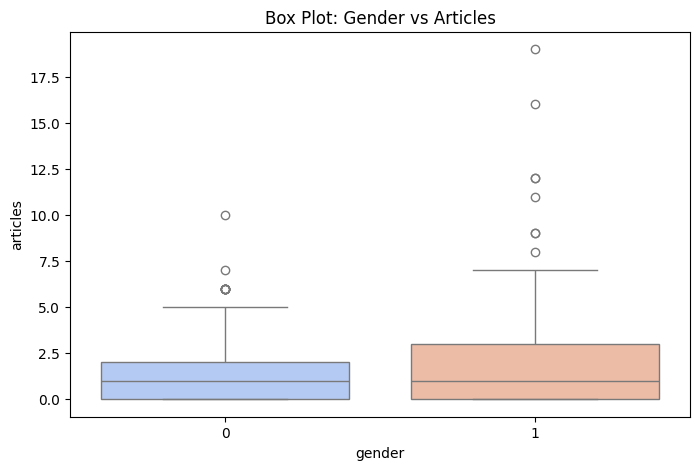

In [105]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="gender", y="articles", palette="coolwarm")
plt.title("Box Plot: Gender vs Articles")
plt.show()

#Hierachical Clustering

In [107]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Selecting numerical features for clustering

In [108]:
df_numeric = df.select_dtypes(include=[np.number])

# Function to compute distance matrix and display dendrogram

In [114]:
def hierarchical_clustering(distance_metric, method='ward'):
    print(f"\nComputing {distance_metric} Distance Matrix...\n")

    # Compute Distance Matrix
    distance_matrix = pdist(df_numeric, metric=distance_metric)
    distance_df = pd.DataFrame(squareform(distance_matrix),
                               index=df_numeric.index,
                               columns=df_numeric.index)

    print("Distance Matrix:")
    print(distance_df)

    # Compute Hierarchical Clustering
    linkage_matrix = linkage(distance_matrix, method=method)

    # Plot Dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=df_numeric.index, leaf_rotation=90)
    plt.title(f"Dendrogram using {distance_metric} distance & {method} method-21bds0169")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

# 1. Euclidean Distance


Computing euclidean Distance Matrix...

Distance Matrix:
rownames        NaT        NaT        NaT        NaT        NaT        NaT  \
rownames                                                                     
NaT        0.000000   1.794687   2.124359   4.335389  19.092221   5.580762   
NaT        1.794687   0.000000   1.700000   3.571680  20.072120   4.834418   
NaT        2.124359   1.700000   0.000000   4.313340  20.000000   4.585368   
NaT        4.335389   3.571680   4.313340   0.000000  23.207863   2.967844   
NaT       19.092221  20.072120  20.000000  23.207863   0.000000  24.104473   
...             ...        ...        ...        ...        ...        ...   
NaT       11.185508  11.342667  11.348661  11.866861  22.108643  12.146312   
NaT       30.530852  31.512182  31.437105  34.317227  15.109322  35.149538   
NaT       12.224385  12.167009  12.311462  12.184515  24.322255  12.569523   
NaT       21.274595  21.979447  22.068985  24.110446  16.942258  25.008449   
NaT   

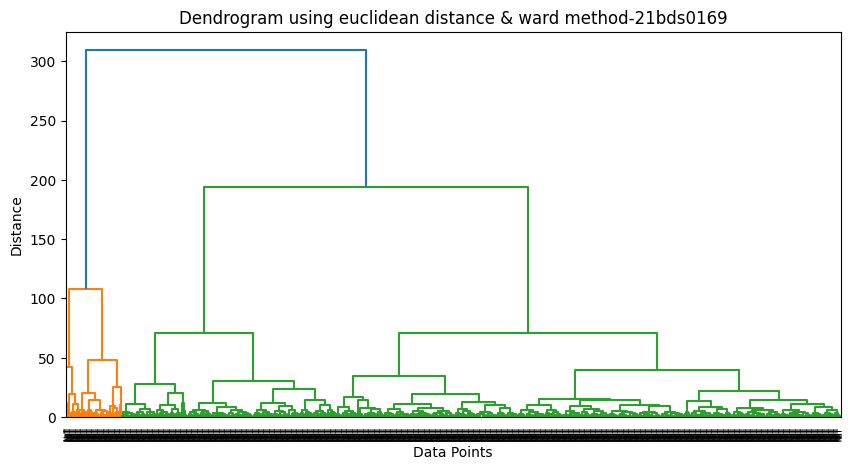

In [115]:
hierarchical_clustering('euclidean')

# 2. Manhattan Distance


Computing cityblock Distance Matrix...

Distance Matrix:
rownames    NaT    NaT    NaT    NaT    NaT    NaT    NaT    NaT    NaT  \
rownames                                                                  
NaT        0.00   3.47   4.23   6.34  22.23   9.07   6.67   5.44   4.10   
NaT        3.47   0.00   1.70   6.87  21.70   8.54   4.14   6.91   3.57   
NaT        4.23   1.70   0.00   8.57  20.00   7.16   3.56   6.79   1.87   
NaT        6.34   6.87   8.57   0.00  28.57   5.41   5.01   3.78   8.44   
NaT       22.23  21.70  20.00  28.57   0.00  27.16  23.56  26.79  21.87   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
NaT       13.34  16.81  16.89  17.68  34.89  17.73  19.33  14.10  16.76   
NaT       42.77  46.24  44.54  47.11  24.54  47.70  48.10  45.33  43.33   
NaT       15.66  16.19  17.89  14.68  37.89  18.73  18.33  15.10  17.76   
NaT       30.78  33.31  35.01  35.56  25.01  39.85  37.45  36.22  34.88   
NaT       54.66  57.19  58.89  59.68  38.8

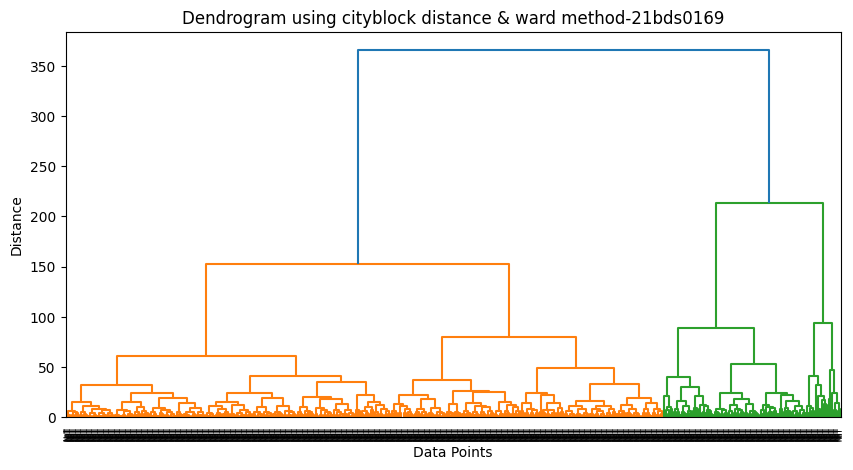

In [116]:
hierarchical_clustering('cityblock')

# 3. Maximum Distance (Chebyshev)


Computing chebyshev Distance Matrix...

Distance Matrix:
rownames    NaT   NaT    NaT   NaT   NaT    NaT    NaT    NaT    NaT   NaT  \
rownames                                                                     
NaT        0.00   1.0   1.23   4.0  19.0   5.00   4.00   3.00   2.10   7.0   
NaT        1.00   0.0   1.70   3.0  20.0   4.00   3.00   2.00   2.57   6.0   
NaT        1.23   1.7   0.00   3.0  20.0   4.00   3.00   2.00   1.00   6.0   
NaT        4.00   3.0   3.00   0.0  23.0   2.41   2.01   1.78   3.44   3.0   
NaT       19.00  20.0  20.00  23.0   0.0  24.00  23.00  22.00  20.00  26.0   
...         ...   ...    ...   ...   ...    ...    ...    ...    ...   ...   
NaT       11.00  11.0  11.00  11.0  19.0  11.00  11.00  11.00  11.00  11.0   
NaT       28.00  29.0  29.00  32.0  12.0  33.00  32.00  31.00  29.00  35.0   
NaT       12.00  12.0  12.00  12.0  21.0  12.00  12.00  12.00  12.00  12.0   
NaT       16.00  16.0  16.00  18.0  16.0  19.00  18.00  17.00  16.00  21.0   
NaT   

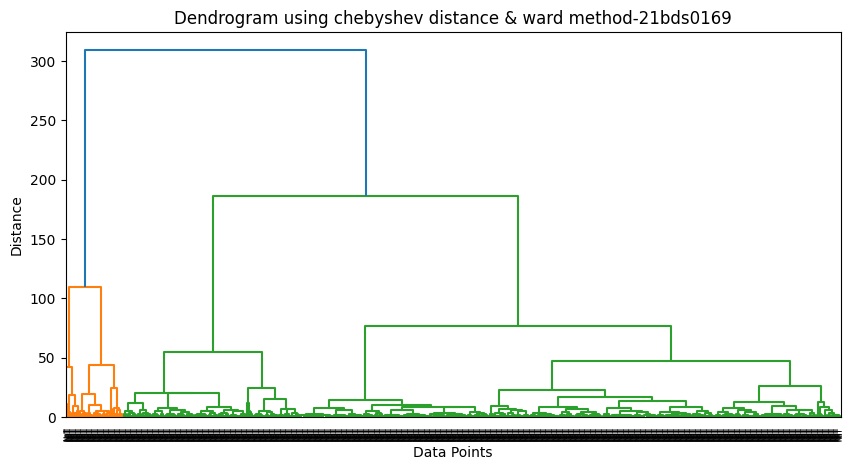

In [117]:
hierarchical_clustering('chebyshev')

# 4. Canberra Distance


Computing canberra Distance Matrix...

Distance Matrix:
rownames       NaT       NaT       NaT       NaT       NaT       NaT  \
rownames                                                               
NaT       0.000000  2.179768  2.273095  1.762162  2.771930  2.730678   
NaT       2.179768  0.000000  0.293103  3.602683  0.918103  2.773050   
NaT       2.273095  0.293103  0.000000  3.854632  0.625000  2.521798   
NaT       1.762162  3.602683  3.854632  0.000000  4.314402  2.038574   
NaT       2.771930  0.918103  0.625000  4.314402  0.000000  2.878941   
...            ...       ...       ...       ...       ...       ...   
NaT       2.063197  4.241893  4.211568  2.149175  4.710402  2.668734   
NaT       2.926579  5.060629  4.774481  2.410661  4.214705  3.314058   
NaT       2.317352  4.139502  4.427807  1.473684  5.014318  3.079336   
NaT       1.683099  3.637350  3.921676  2.941781  3.472503  4.173179   
NaT       1.864971  3.798593  4.086898  3.090351  3.572193  4.226522   

rownam

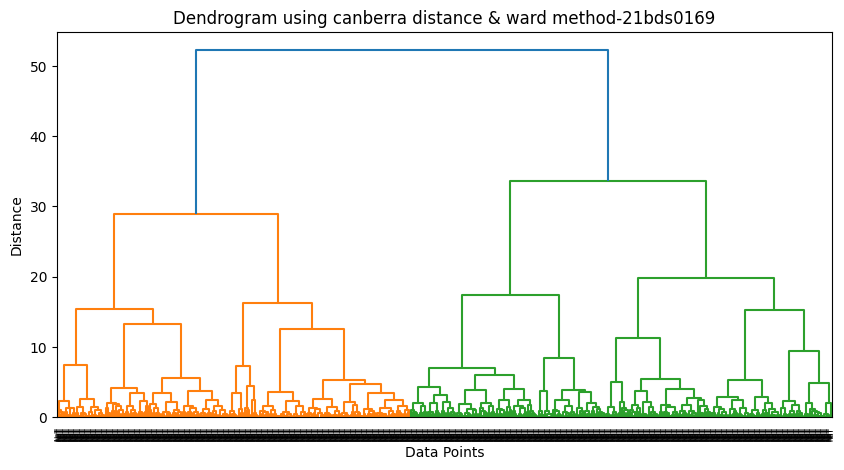

In [118]:
hierarchical_clustering('canberra')

# 5. Binary Distance


Computing hamming Distance Matrix...

Distance Matrix:
rownames       NaT       NaT       NaT       NaT       NaT       NaT  \
rownames                                                               
NaT       0.000000  0.666667  0.666667  0.500000  0.666667  0.666667   
NaT       0.666667  0.000000  0.166667  0.833333  0.333333  0.666667   
NaT       0.666667  0.166667  0.000000  0.833333  0.166667  0.666667   
NaT       0.500000  0.833333  0.833333  0.000000  0.833333  0.666667   
NaT       0.666667  0.333333  0.166667  0.833333  0.000000  0.666667   
...            ...       ...       ...       ...       ...       ...   
NaT       0.500000  1.000000  1.000000  0.666667  1.000000  0.666667   
NaT       0.666667  1.000000  1.000000  0.500000  1.000000  0.833333   
NaT       0.666667  1.000000  1.000000  0.500000  1.000000  0.833333   
NaT       0.500000  0.833333  0.833333  0.666667  0.833333  0.833333   
NaT       0.500000  0.833333  0.833333  0.666667  0.833333  0.833333   

rowname

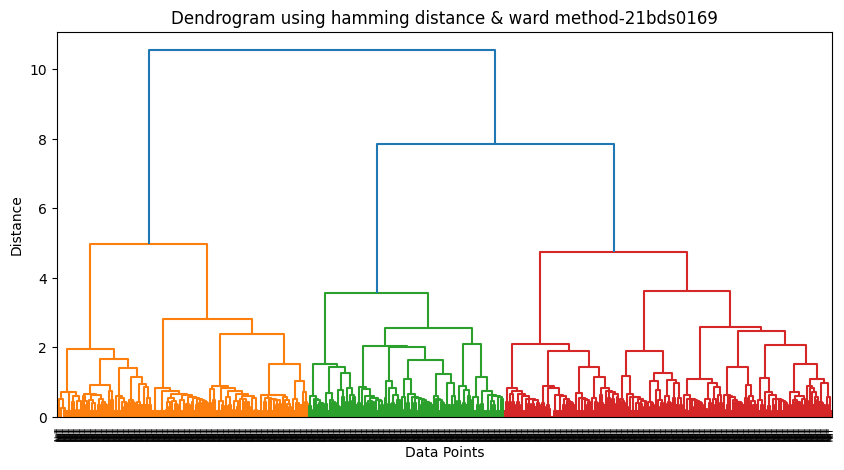

In [119]:
hierarchical_clustering('hamming')

# 6. Minkowski Distance (p=3)


Computing minkowski Distance Matrix...

Distance Matrix:
rownames        NaT        NaT        NaT        NaT        NaT        NaT  \
rownames                                                                     
NaT        0.000000   1.794687   2.124359   4.335389  19.092221   5.580762   
NaT        1.794687   0.000000   1.700000   3.571680  20.072120   4.834418   
NaT        2.124359   1.700000   0.000000   4.313340  20.000000   4.585368   
NaT        4.335389   3.571680   4.313340   0.000000  23.207863   2.967844   
NaT       19.092221  20.072120  20.000000  23.207863   0.000000  24.104473   
...             ...        ...        ...        ...        ...        ...   
NaT       11.185508  11.342667  11.348661  11.866861  22.108643  12.146312   
NaT       30.530852  31.512182  31.437105  34.317227  15.109322  35.149538   
NaT       12.224385  12.167009  12.311462  12.184515  24.322255  12.569523   
NaT       21.274595  21.979447  22.068985  24.110446  16.942258  25.008449   
NaT   

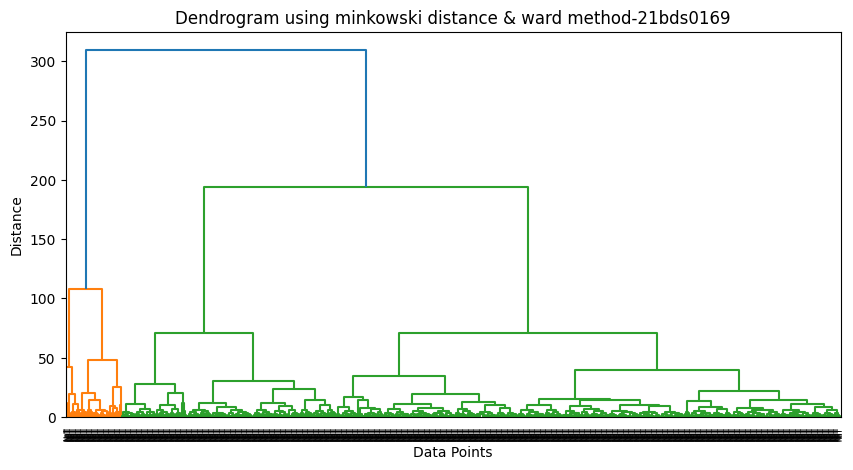

In [120]:
hierarchical_clustering('minkowski')

#K-mean and dbscan clustering

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import plotly.express as px

In [122]:
df_numeric = df.select_dtypes(include=[np.number])

# 1. Scale the Numerical Columns

In [123]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)
print("\nScaled Data:\n", pd.DataFrame(data_scaled, columns=df_numeric.columns).head())


Scaled Data:
      gender   married  articles      kids     price    mentor
0  0.923161  0.714074 -0.879419 -0.647621 -0.592765 -0.186440
1 -1.083234 -1.400416 -0.879419 -0.647621 -1.070547 -0.291939
2 -1.083234 -1.400416 -0.879419 -0.647621  0.657602 -0.291939
3  0.923161  0.714074 -0.879419  0.660488 -1.954953 -0.608437
4 -1.083234 -1.400416 -0.879419 -0.647621  0.657602  1.818048


# 2. Using the Elbow Method to find Optimal Clusters

In [124]:
wcss = []  # Within Cluster Sum of Squares
K = range(1, 11)  # Checking 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve

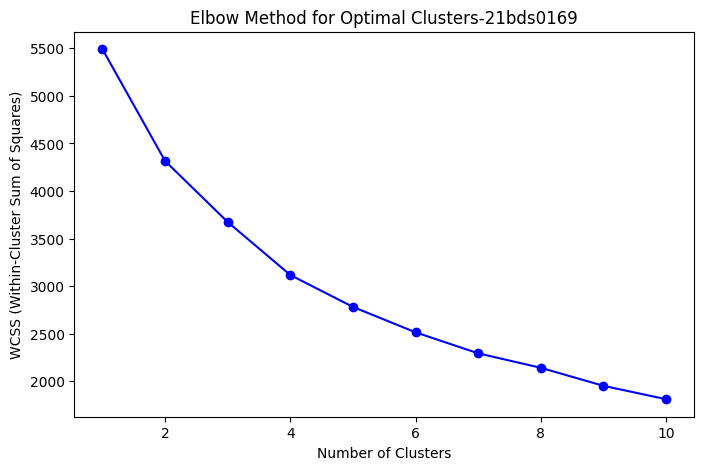

In [126]:
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal Clusters-21bds0169")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()


# 3. Applying K-Means Clustering with k=5

In [127]:
kmeans_result = KMeans(n_clusters=5, random_state=123, n_init=10)
df["KMeans_Cluster"] = kmeans_result.fit_predict(data_scaled)

# Plot K-Means Clusters

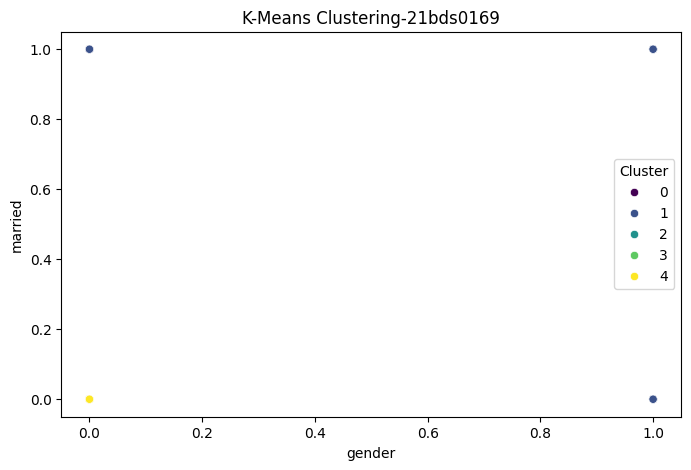

In [129]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_numeric.iloc[:, 0], y=df_numeric.iloc[:, 1], hue=df["KMeans_Cluster"], palette="viridis")
plt.title("K-Means Clustering-21bds0169")
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.legend(title="Cluster")
plt.show()


# 4. Apply DBSCAN Clustering (epsilon=0.5, min_samples=5)

In [130]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(data_scaled)


# Visualizing DBSCAN Results

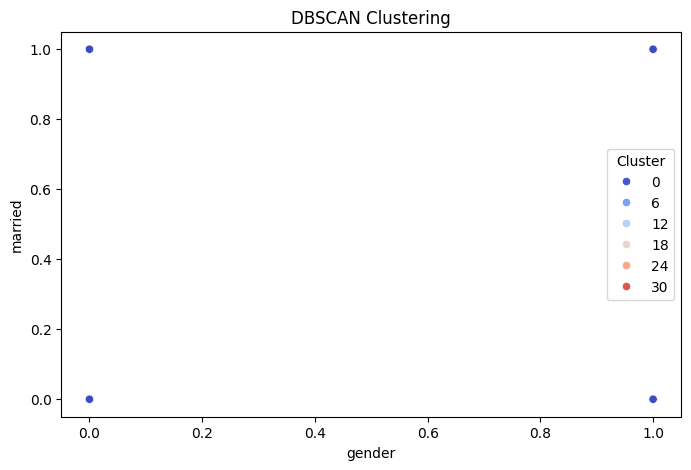

In [131]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_numeric.iloc[:, 0], y=df_numeric.iloc[:, 1], hue=df["DBSCAN_Cluster"], palette="coolwarm")
plt.title("DBSCAN Clustering")
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.legend(title="Cluster")
plt.show()

#Principal Component Analysis

In [132]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting only numerical columns for PCA

In [133]:
df_numeric = df.select_dtypes(include=[np.number])

# 1. Standardizing the Data

In [134]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 2. Performing PCA

In [135]:
pca = PCA()
pca_result = pca.fit(df_scaled)

# 3. Print PCA Results (Eigenvalues and Component Loadings)

In [137]:
print("\nExplained Variance (Eigenvalues):")
print(pca.explained_variance_ratio_)
print("\nPrincipal Component Loadings:")
loadings = pd.DataFrame(pca.components_, columns=df_numeric.columns)
print(loadings)


Explained Variance (Eigenvalues):
[0.24649653 0.19035781 0.16756159 0.12258431 0.11545673 0.07493572
 0.07008609 0.01252123]

Principal Component Loadings:
     gender   married  articles      kids     price    mentor  KMeans_Cluster  \
0  0.253911  0.624488  0.211248  0.408883  0.024047  0.240914       -0.483105   
1  0.022263 -0.313927  0.442814 -0.161593  0.441297  0.597615        0.123941   
2  0.589267 -0.102832 -0.145822  0.497757 -0.002756 -0.049925        0.583183   
3  0.418868  0.091235  0.174896 -0.139236  0.420867 -0.014101       -0.013791   
4 -0.252500  0.077228 -0.639225  0.189995  0.688845  0.041474       -0.067258   
5  0.281529 -0.003849 -0.533407 -0.290614 -0.346205  0.641618       -0.082464   
6 -0.468780 -0.096451  0.109037  0.577286 -0.181196  0.397729        0.161354   
7 -0.222659  0.690858  0.049166 -0.292815  0.018571  0.102685        0.611225   

   DBSCAN_Cluster  
0       -0.204266  
1       -0.333931  
2       -0.174818  
3        0.767289  
4       -0.06

# 4. Scree Plot (Determine Optimal Components)

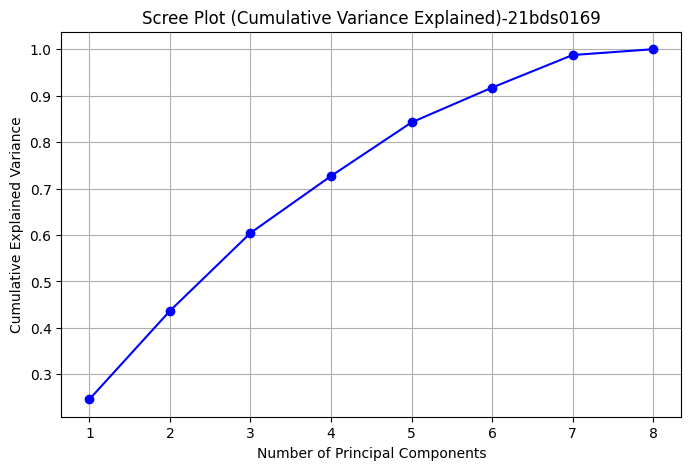

In [139]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='b')
plt.title("Scree Plot (Cumulative Variance Explained)-21bds0169")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# 5. Selecting Optimal Number of Components (n_comp)

In [140]:
n_comp = 2  # Select based on scree plot

pca_optimal = PCA(n_components=n_comp)
df_pca = pca_optimal.fit_transform(df_scaled)

# 6. Visualizing PCA Components (Biplot)

<ipython-input-142-f75e1ae588d2>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7, edgecolors='k', cmap='viridis')


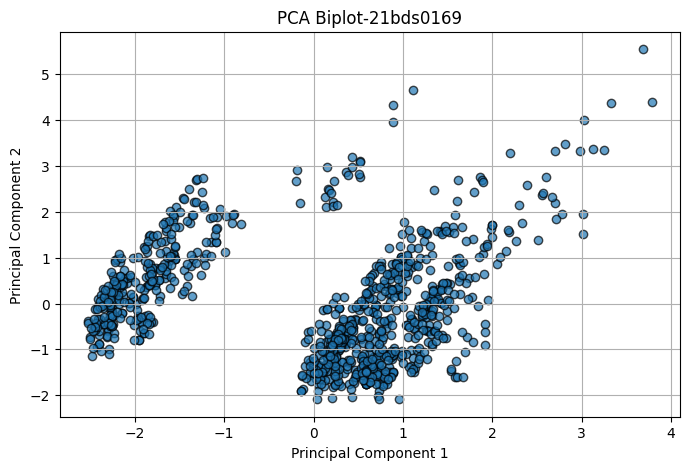

In [142]:
plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7, edgecolors='k', cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Biplot-21bds0169")
plt.grid(True)
plt.show()

# 7. Interpreting Results

In [143]:
print("\nSummary of PCA:")
print(pd.DataFrame({
    "Component": range(1, n_comp + 1),
    "Explained Variance": pca_optimal.explained_variance_ratio_,
    "Cumulative Variance": np.cumsum(pca_optimal.explained_variance_ratio_)
}))


Summary of PCA:
   Component  Explained Variance  Cumulative Variance
0          1            0.246497             0.246497
1          2            0.190358             0.436854


#simple linear regression

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 1. Identify Feature Relationships using Pairplot

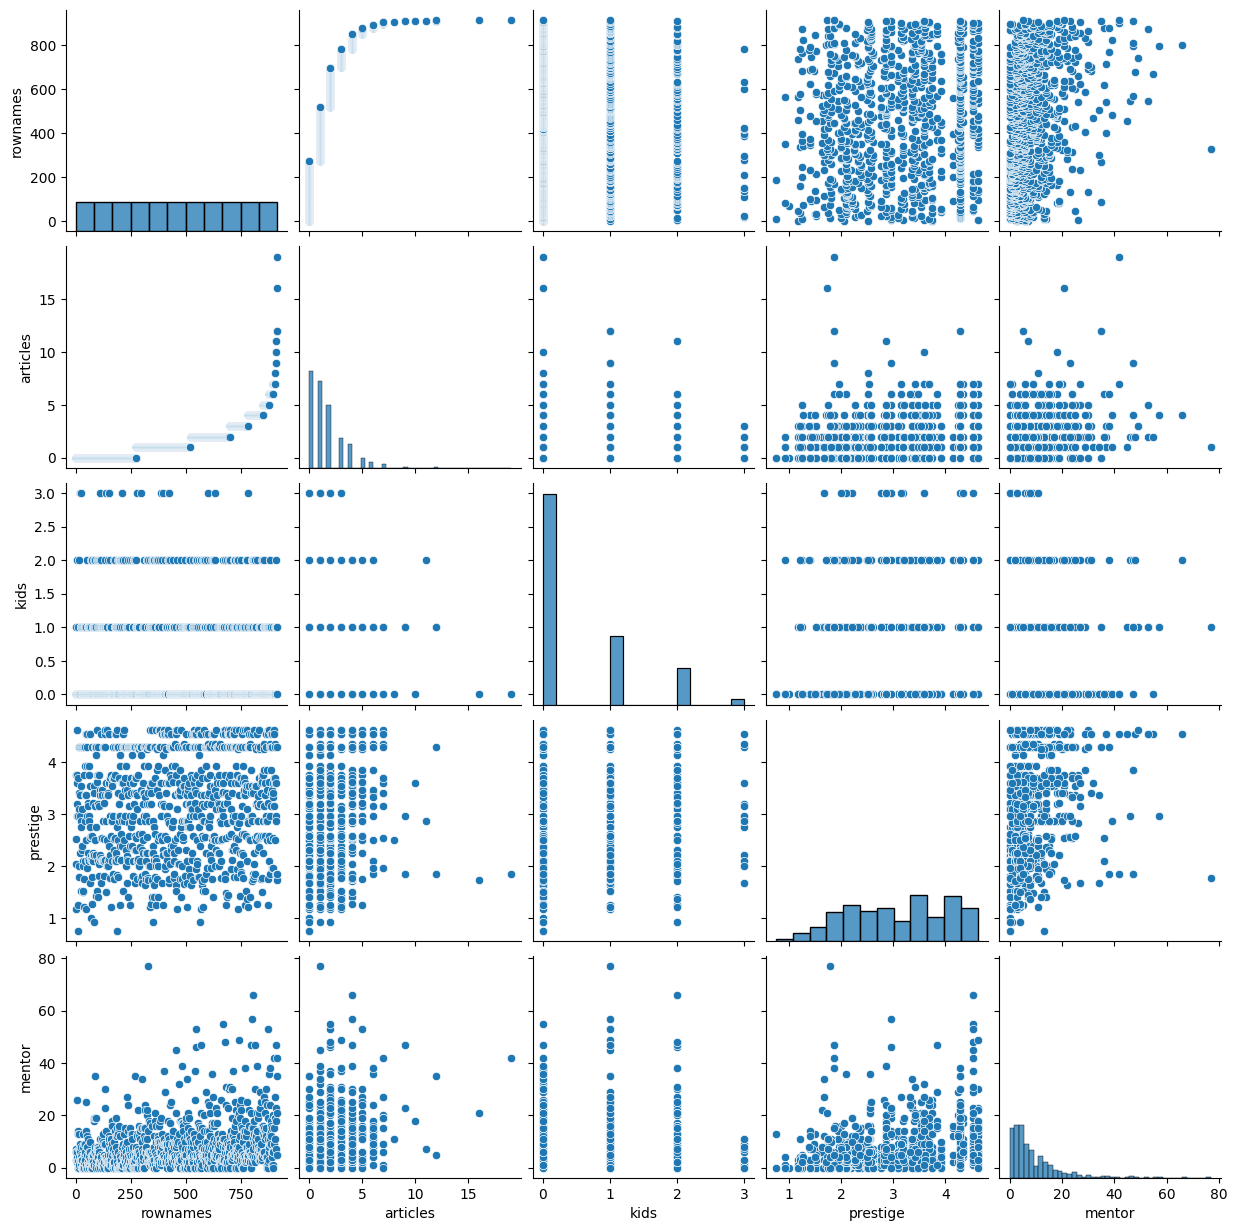

In [146]:
df = pd.read_csv(url)
sns.pairplot(df)
plt.show()

# 2. Assign Independent (X) & Dependent (Y) Variable

In [147]:
X = df[['prestige']]  # Independent Feature
Y = df['articles']     # Dependent Feature

# 3. Splitting Dataset (Training: 2/3, Test: 1/3)

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=123)

# 4. Fitting Simple Linear Regression Model

In [149]:
reg1 = LinearRegression()
reg1.fit(X_train, Y_train)

LinearRegression()

# 5. Checking Residual Errors (Model Summary)

In [150]:
X_train_sm = sm.add_constant(X_train)  # Add intercept for statsmodels
reg1_sm = sm.OLS(Y_train, X_train_sm).fit()
print("\nSimple Linear Regression Summary:\n", reg1_sm.summary())


Simple Linear Regression Summary:
                             OLS Regression Results                            
Dep. Variable:               articles   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.309
Date:                Thu, 03 Apr 2025   Prob (F-statistic):              0.253
Time:                        15:51:06   Log-Likelihood:                -1284.9
No. Observations:                 610   AIC:                             2574.
Df Residuals:                     608   BIC:                             2583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1

# 6. Predicting Test Set Results

In [151]:
y_pred = reg1.predict(X_test)

# 7. Visualizing Test Set Results

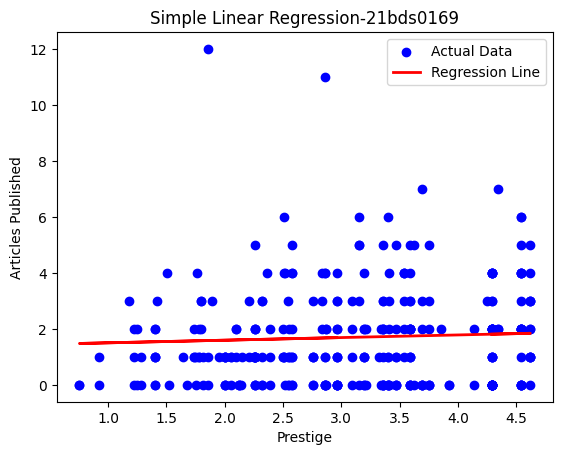

In [153]:
plt.scatter(X_test, Y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Prestige")
plt.ylabel("Articles Published")
plt.title("Simple Linear Regression-21bds0169")
plt.legend()
plt.show()